In [1]:
import pandas as pd
import numpy as np

# plots
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
%matplotlib inline

### XGBOOST

In [2]:
df_train = pd.read_csv('../data/train_con_features_encoded.csv', index_col='Unnamed: 0')
df_test = pd.read_csv('../data/test_con_features_encoded.csv', index_col='Unnamed: 0')
display(df_train.head())

,id,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,gimnasio,usosmultiples,piscina,...,cantidad_palabras_descripcion,relacion_palabras_descripcion,es_avenida,es_ciudad_capital,ciudad_turistica_top15,anio,mes,tipodepropiedad_cb,ciudad_cb,provincia_cb
0,254099,8.116114,2.0,1.0,2.0,80.0,80.0,0.0,0.0,0.0,...,0,0.000000,1,0,0,2015,8,2.763765e+06,3.384582e+06,3.471689e+06
1,53461,10.000000,3.0,2.0,2.0,268.0,180.0,0.0,0.0,0.0,...,1,0.007968,1,0,0,2013,6,2.898908e+06,4.604780e+06,3.471689e+06
2,247984,5.000000,3.0,2.0,2.0,144.0,166.0,0.0,0.0,0.0,...,10,0.046957,0,0,0,2015,10,2.398159e+06,8.890818e+05,2.367701e+06
3,209067,1.000000,2.0,1.0,1.0,63.0,67.0,0.0,0.0,0.0,...,0,0.000000,0,0,0,2012,3,2.398159e+06,1.479134e+06,2.762459e+06
4,185997,10.000000,2.0,1.0,1.0,95.0,95.0,0.0,0.0,0.0,...,1,0.074108,0,0,0,2016,6,2.763765e+06,2.749654e+06,2.367701e+06


In [3]:
feature_cols = df_train.columns.tolist()
feature_cols.remove('precio')

X = df_train[feature_cols]
y = df_train['precio']

df_test = df_test[feature_cols]
feature_cols

['id',
 'antiguedad',
 'habitaciones',
 'garages',
 'banos',
 'metroscubiertos',
 'metrostotales',
 'gimnasio',
 'usosmultiples',
 'piscina',
 'escuelascercanas',
 'centroscomercialescercanos',
 'cantidad_amenities',
 'cantidad_servicios',
 'relacion_metros',
 'metros_por_habitacion',
 'metros_por_bano',
 'metros_por_amenities',
 'bano_por_habitacion',
 'garages_por_habitacion',
 'precio_prom_ciudad',
 'precio_prom_propiedad',
 'provincia_top5',
 'seguridad_descripcion',
 'moderno_descripcion',
 'hermoso_descripcion',
 'estado_descripcion',
 'seguridad_titulo',
 'moderno_titulo',
 'hermoso_titulo',
 'estado_titulo',
 'cantidad_palabras_descripcion',
 'relacion_palabras_descripcion',
 'es_avenida',
 'es_ciudad_capital',
 'ciudad_turistica_top15',
 'anio',
 'mes',
 'tipodepropiedad_cb',
 'ciudad_cb',
 'provincia_cb']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(180000, 41) (180000,)
(60000, 41) (60000,)


In [5]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

'''xgbreg = XGBRegressor(objective='reg:squarederror', nthreads=-1)

hyp_params = {
    "learning_rate"    : [0.05, 0.08, 0.10, 0.12],
    "max_depth"        : [ 3, 4, 5, 6, 8, 9],
    "min_child_weight" : [ 3, 5, 7, 9, 11],
    "gamma"            : [0.0],
    "alpha"            : [ 10 ],
    "colsample_bytree" : [ 0.5, 0.7, 0.8, 0.9 ], 
    "n_estimators"     : [1000, 1100] 
}

from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(xgbreg, hyp_params, n_iter=10, n_jobs=1, scoring='neg_mean_squared_error')
random_search.fit(X, y)

best_hyp = random_search.best_params_
best_hyp'''

'xgbreg = XGBRegressor(objective=\'reg:squarederror\', nthreads=-1)\n\nhyp_params = {\n    "learning_rate"    : [0.05, 0.08, 0.10, 0.12],\n    "max_depth"        : [ 3, 4, 5, 6, 8, 9],\n    "min_child_weight" : [ 3, 5, 7, 9, 11],\n    "gamma"            : [0.0],\n    "alpha"            : [ 10 ],\n    "colsample_bytree" : [ 0.5, 0.7, 0.8, 0.9 ], \n    "n_estimators"     : [1000, 1100] \n}\n\nfrom sklearn.model_selection import RandomizedSearchCV\n\nrandom_search = RandomizedSearchCV(xgbreg, hyp_params, n_iter=10, n_jobs=1, scoring=\'neg_mean_squared_error\')\nrandom_search.fit(X, y)\n\nbest_hyp = random_search.best_params_\nbest_hyp'

In [6]:
best_n_estimators = 1000      #best_ant= 800
best_min_child_weight = 5     #best_ant= 7
best_max_depth = 8            #best_ant= 5
best_learning_rate = 0.08     #best_ant= 0.10
best_gamma = 0.0              #best_ant= 0.0
best_colsample_bytree = 0.8   #best_ant= 0.8
best_alpha = 10               #best_ant= 10

In [7]:
XGBoost = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=best_n_estimators, min_child_weight=best_min_child_weight, 
                           max_depth=best_max_depth, learning_rate=best_learning_rate, gamma=best_gamma, 
                           colsample_bytree=best_colsample_bytree, alpha=best_alpha, eval_metric='mae')

XGBoost_fit = XGBoost.fit(X_train, y_train)

/home/pablodg/.local/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [8]:
XGBoost_pred = XGBoost_fit.predict(X_test)

In [9]:
from sklearn.metrics import mean_absolute_error

XGBoost_mae = mean_absolute_error(y_test, XGBoost_pred)
XGBoost_mae_train = mean_absolute_error(y_train, XGBoost_fit.predict(X_train))
print(f"MAE XGBoost (train): {XGBoost_mae_train:.5f}")
print(f"MAE XGBoost: {XGBoost_mae:.5f}")
print("------------------------------")

MAE XGBoost (train): 415384.12148
MAE XGBoost: 577863.33750
------------------------------


In [10]:
XGBoost_fit.feature_importances_

array([0.00495534, 0.01789176, 0.01429127, 0.02886733, 0.04885814,
       0.21608374, 0.02460366, 0.0215534 , 0.00610361, 0.02269365,
       0.00492855, 0.00863604, 0.02284327, 0.00559221, 0.01490248,
       0.02033747, 0.00724378, 0.00613622, 0.03544028, 0.01262573,
       0.10234412, 0.0421644 , 0.01296713, 0.00695471, 0.00988339,
       0.00864192, 0.00494942, 0.00379537, 0.00482565, 0.00660323,
       0.00531853, 0.00582066, 0.00684392, 0.00713373, 0.01083124,
       0.01050466, 0.03852861, 0.00627175, 0.04682296, 0.08150177,
       0.03270493], dtype=float32)

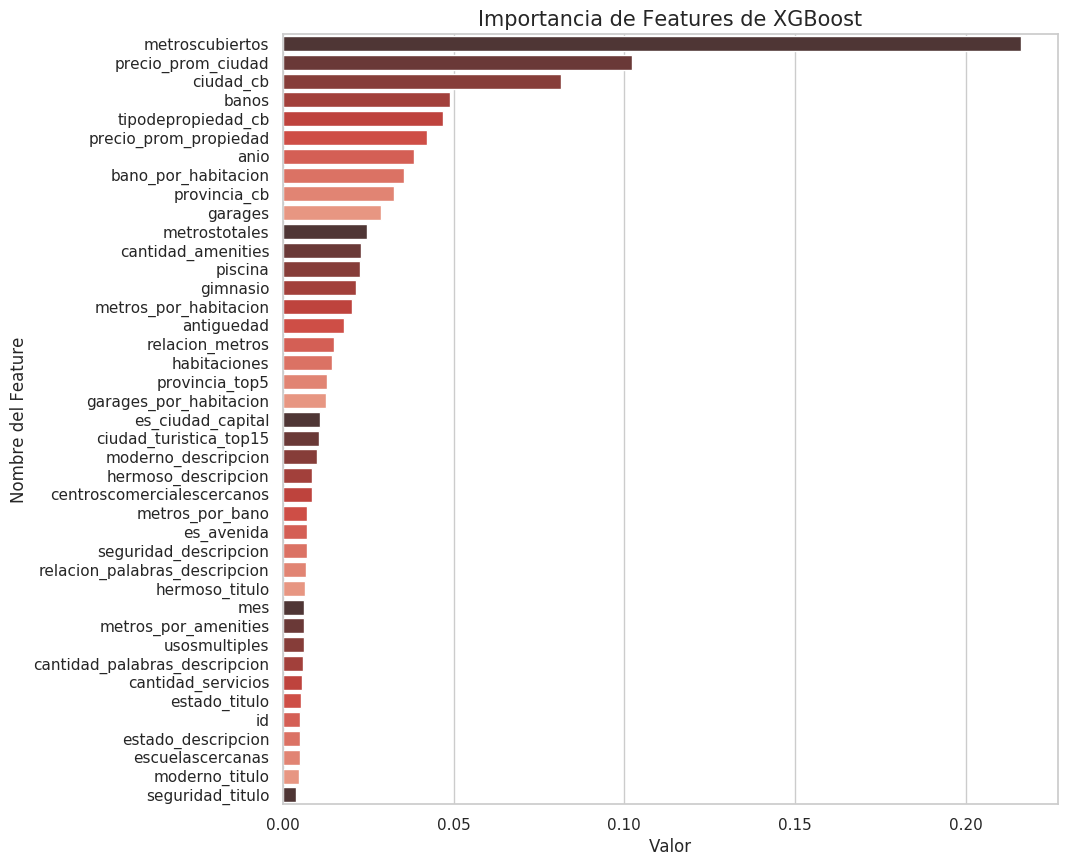

In [11]:
features = pd.DataFrame(index=feature_cols)

features['imp'] = XGBoost_fit.feature_importances_
features = features.sort_values(['imp'], ascending = False)
features

plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 10)
sns.set(style="whitegrid")

g = sns.barplot(y=features.index, x=features.imp, \
                palette=sns.color_palette("Reds_d", 10));

g.set_title('Importancia de Features de XGBoost', fontsize=15);
g.set_xlabel('Valor');
g.set_ylabel('Nombre del Feature');

In [12]:
XGBoost_pred_sumbit = XGBoost.fit(X, y).predict(df_test)

/home/pablodg/.local/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/pablodg/.local/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [13]:
resultado_submit = pd.DataFrame(index=df_test.index)
resultado_submit['id'] = df_test['id']
resultado_submit['target'] = XGBoost_pred_sumbit
display(resultado_submit.head())
resultado_submit.to_csv('../data/sumbitXGBoost-v2.csv',index=False)

,id,target
0,4941,6.669294e+06
1,51775,9.612638e+05
2,115253,2.375248e+06
3,299321,1.301313e+06
4,173570,5.870004e+05


#### Score en Kaggle (features => score):
 **1.** ***Usando CatBoost encoded*** y ['id',
 'antiguedad',
 'habitaciones',
 'garages',
 'banos',
 'metroscubiertos',
 'metrostotales',
 'gimnasio',
 'usosmultiples',
 'piscina',
 'escuelascercanas',
 'centroscomercialescercanos',
 'cantidad_amenities',
 'cantidad_servicios',
 'relacion_metros',
 'metros_por_habitacion',
 'metros_por_bano',
 'metros_por_amenities',
 'bano_por_habitacion',
 'garages_por_habitacion',
 'precio_prom_ciudad',
 'precio_prom_propiedad',
 'provincia_top5',
 'seguridad_descripcion',
 'moderno_descripcion',
 'hermoso_descripcion',
 'estado_descripcion',
 'seguridad_titulo',
 'moderno_titulo',
 'hermoso_titulo',
 'estado_titulo',
 'cantidad_palabras_descripcion',
 'relacion_palabras_descripcion',
 'es_avenida',
 'es_ciudad_capital',
 'ciudad_turistica_top15',
 'anio',
 'mes',
 'tipodepropiedad_cb',
 'ciudad_cb',
 'provincia_cb']=> ***611362.86502*** con objective='reg:squarederror', n_estimators=500, min_child_weight=7, max_depth=5, learning_rate=0.08, gamma=0.0, colsample_bytree=0.8, alpha=10
***LOCAL MAE: 609339.01235***

 **2.** ***Usando CatBoost encoded*** => ***835494.45170*** con objective='reg:squarederror', n_estimators=800, min_child_weight=7, max_depth=5, learning_rate=0.10, gamma=0.0, colsample_bytree=0.8, alpha=10
***LOCAL MAE: 602000.00000*** (OVERFITTING)

**3.** ***Usando CatBoost encoded*** y ['id',
 'antiguedad',
 'habitaciones',
 'garages',
 'banos',
 'metroscubiertos',
 'metrostotales',
 'gimnasio',
 'usosmultiples',
 'piscina',
 'escuelascercanas',
 'centroscomercialescercanos',
 'cantidad_amenities',
 'cantidad_servicios',
 'relacion_metros',
 'metros_por_habitacion',
 'metros_por_bano',
 'metros_por_amenities',
 'bano_por_habitacion',
 'garages_por_habitacion',
 'precio_prom_ciudad',
 'precio_prom_propiedad',
 'provincia_top5',
 'seguridad_descripcion',
 'moderno_descripcion',
 'hermoso_descripcion',
 'estado_descripcion',
 'seguridad_titulo',
 'moderno_titulo',
 'hermoso_titulo',
 'estado_titulo',
 'cantidad_palabras_descripcion',
 'relacion_palabras_descripcion',
 'es_avenida',
 'es_ciudad_capital',
 'ciudad_turistica_top15',
 'anio',
 'mes',
 'tipodepropiedad_cb',
 'ciudad_cb',
 'provincia_cb']=> ***603656.20712*** con objective='reg:squarederror', n_estimators=800, min_child_weight=7, max_depth=5, learning_rate=0.10, gamma=0.0, colsample_bytree=0.8, alpha=10
***LOCAL MAE: 600512.04779***

**4.** ***Usando CatBoost encoded*** y ['id',
 'antiguedad',
 'habitaciones',
 'garages',
 'banos',
 'metroscubiertos',
 'metrostotales',
 'gimnasio',
 'usosmultiples',
 'piscina',
 'escuelascercanas',
 'centroscomercialescercanos',
 'cantidad_amenities',
 'cantidad_servicios',
 'relacion_metros',
 'metros_por_habitacion',
 'metros_por_bano',
 'metros_por_amenities',
 'bano_por_habitacion',
 'garages_por_habitacion',
 'precio_prom_ciudad',
 'precio_prom_propiedad',
 'provincia_top5',
 'seguridad_descripcion',
 'moderno_descripcion',
 'hermoso_descripcion',
 'estado_descripcion',
 'seguridad_titulo',
 'moderno_titulo',
 'hermoso_titulo',
 'estado_titulo',
 'cantidad_palabras_descripcion',
 'relacion_palabras_descripcion',
 'es_avenida',
 'es_ciudad_capital',
 'ciudad_turistica_top15',
 'anio',
 'mes',
 'tipodepropiedad_cb',
 'ciudad_cb',
 'provincia_cb']=> ***577980.12206*** con objective='reg:squarederror', n_estimators=1000, min_child_weight=5, max_depth=8, learning_rate=0.8, gamma=0.0, colsample_bytree=0.8, alpha=10
***LOCAL MAE: 577863.33750***